In [2]:
import pandas as pd
import numpy as np



# STEP1. 전처리

In [3]:
# 500개 일부 추출해서 확인할 것 
df = pd.read_csv('/Users/shimyuna/Desktop/✳︎/Python-Data-Mining/datamining/TB_RECIPE_SEARCH-220701.csv', encoding='cp949')
#df = df.head(10)
df.columns = ['레시피일련번호','레시피제목','요리명','등록자ID','등록자명','조회수','추천수','스크랩수','요리방법별명','요리상황별명','요리재료별명','요리종류별명','요리소개','요리재료내용','요리인분명','요리난이도명','요리시간명','최초등록일시']
df.head()


,레시피일련번호,레시피제목,요리명,등록자ID,등록자명,조회수,추천수,스크랩수,요리방법별명,요리상황별명,요리재료별명,요리종류별명,요리소개,요리재료내용,요리인분명,요리난이도명,요리시간명,최초등록일시
0,128671,어묵김말이,어묵김말이,skfo0701,꽃날,9592,6,66,튀김,간식,가공식품류,디저트,맛있는 김말이에 쫄깃함을 더한 어묵 김말이예요-,[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개|...,2인분,초급,60분이내,20070402131403
1,128892,두부에 꼬리가 달렸어요!!,NaN,skfo0701,꽃날,5538,3,26,부침,일상,해물류,밑반찬,꼬리가 너-무- 매력적인 두부새우전. 두부와 야채를 한번에!! 영양까지 만점인 두부...,[재료] 두부 1/2모| 당근 1/2개| 고추 2개| 브로콜리 1/4개| 새우 4마...,3인분,초급,30분이내,20070402205937
2,128932,입안에서 톡톡톡,NaN,skfo0701,꽃날,6802,8,36,굽기,일상,해물류,밥/죽/떡,간단하게 만들어 보는 알이 톡톡톡 알밥♥ 다 먹고 누룽지까지 싹싹 긁어먹는게 최고죠...,[재료] 밥 1+1/2공기| 당근 1/4개| 치자단무지 1/2개| 신김치 1쪽| 무...,2인분,초급,30분이내,20070402224355
3,131871,★현미호두죽,현미호두죽,cds1117,햇님&별님,2912,0,9,끓이기,일상,쌀,밥/죽/떡,현미호두죽,[재료] 현미 4컵| 찹쌀 2컵| 호두 50g| 물 1/2컵| 소금 약간,2인분,초급,30분이내,20070410142301
4,139247,부들부들 보들보들 북어갈비♥,북어갈비,skfo0701,꽃날,6865,3,97,굽기,술안주,건어물류,메인반찬,오늘은 집에서 굴러다니고 쉽게 구할 수 있는 북어로 일품요리를 만들어 보았어요! 도...,[재료] 북어포 1마리| 찹쌀가루 1C [양념] 간장 2T| 설탕 1T| 물 1T|...,2인분,초급,60분이내,20070501000844


### (1) 필요하다고 판단되는 주요 컬럼 추출

In [4]:
## (1) 필요하다고 판단되는 주요 컬럼 추출
## 요리명, 조회수, 추천수, 스크랩수, 요리방법별명, 요리상황설명, 요리종류별명, 요리재료내용(전처리-> 요리재료갯수), 요리인분명(~인분 제거), 요리난이도명, 요리시간명(~분이내 제거)

final_df = df[['요리명','조회수','추천수','스크랩수','요리방법별명','요리상황별명','요리종류별명','요리재료내용','요리인분명','요리난이도명','요리시간명']]

final_df.head()


,요리명,조회수,추천수,스크랩수,요리방법별명,요리상황별명,요리종류별명,요리재료내용,요리인분명,요리난이도명,요리시간명
0,어묵김말이,9592,6,66,튀김,간식,디저트,[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개|...,2인분,초급,60분이내
1,NaN,5538,3,26,부침,일상,밑반찬,[재료] 두부 1/2모| 당근 1/2개| 고추 2개| 브로콜리 1/4개| 새우 4마...,3인분,초급,30분이내
2,NaN,6802,8,36,굽기,일상,밥/죽/떡,[재료] 밥 1+1/2공기| 당근 1/4개| 치자단무지 1/2개| 신김치 1쪽| 무...,2인분,초급,30분이내
3,현미호두죽,2912,0,9,끓이기,일상,밥/죽/떡,[재료] 현미 4컵| 찹쌀 2컵| 호두 50g| 물 1/2컵| 소금 약간,2인분,초급,30분이내
4,북어갈비,6865,3,97,굽기,술안주,메인반찬,[재료] 북어포 1마리| 찹쌀가루 1C [양념] 간장 2T| 설탕 1T| 물 1T|...,2인분,초급,60분이내


### (2) 주요 파라미터 전처리 작업

In [5]:
# 주요 파라미터 전처리 작업
# 요리재료내용 일부 확인을 통해 데이터의 상황을 판단
print(final_df['요리재료내용'][0])
print(final_df['요리재료내용'][1])
print(final_df['요리재료내용'][2])

# 요리재료내용 컬럼 값들을 확인 후, 해당 레시피에 활용되는 재료의 갯수를 알 수 있도록 전처리 
final_df['요리재료내용'] = final_df['요리재료내용'].fillna('-1')

final_df['요리재료_count'] = 0 # 컬럼을 추가하기 위해 초기화

for i in range(len(final_df)):
  if final_df['요리재료내용'][i] == '-1':
    final_df['요리재료_count'][i] = 0
  else:
    final_df['요리재료_count'][i] = final_df['요리재료내용'][i].count('|')+1


[재료] 어묵 2개| 김밥용김 3장| 당면 1움큼| 양파 1/2개| 당근 1/2개| 깻잎 6장| 튀김가루 1컵 | 올리브유 적당량| 간장 1T| 참기름 1T
[재료] 두부 1/2모| 당근 1/2개| 고추 2개| 브로콜리 1/4개| 새우 4마리| 녹말가루| 계란 1개
[재료] 밥 1+1/2공기| 당근 1/4개| 치자단무지 1/2개| 신김치 1쪽| 무순 약간| 날치알 6스푼| 김가루 약간| 후리가케(또는밥이랑같은류)| 참기름 약간| 통깨 약간| 계란 노른자 2알


/var/folders/z2/19dsvtjd5zvdfdpw027wjk980000gn/T/ipykernel_38013/3049290503.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['요리재료내용'] = final_df['요리재료내용'].fillna('-1')
/var/folders/z2/19dsvtjd5zvdfdpw027wjk980000gn/T/ipykernel_38013/3049290503.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['요리재료_count'] = 0 # 컬럼을 추가하기 위해 초기화
/var/folders/z2/19dsvtjd5zvdfdpw027wjk980000gn/T/ipykernel_38013/3049290503.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice 

In [6]:

final_df = final_df[['요리명','조회수','추천수','스크랩수','요리방법별명','요리상황별명','요리종류별명','요리재료_count','요리인분명','요리난이도명','요리시간명']]
final_df.head()

,요리명,조회수,추천수,스크랩수,요리방법별명,요리상황별명,요리종류별명,요리재료_count,요리인분명,요리난이도명,요리시간명
0,어묵김말이,9592,6,66,튀김,간식,디저트,10,2인분,초급,60분이내
1,NaN,5538,3,26,부침,일상,밑반찬,7,3인분,초급,30분이내
2,NaN,6802,8,36,굽기,일상,밥/죽/떡,11,2인분,초급,30분이내
3,현미호두죽,2912,0,9,끓이기,일상,밥/죽/떡,5,2인분,초급,30분이내
4,북어갈비,6865,3,97,굽기,술안주,메인반찬,9,2인분,초급,60분이내


In [7]:
# 주요 파라미터 전처리 작업
# 각 파라미터의 고유 값을 확인 후, 문자열로 된 자료값들을 파싱하여 숫자 값으로 변환해 데이터 분석에 용이하도록 정리함 

#일정하지 않은 값으로 고유값에 각각 인덱스를 부여해 값들을 숫자로 변환해 분류를 용이하게 함
print(final_df['요리방법별명'].unique())
print(final_df['요리상황별명'].unique())
print(final_df['요리종류별명'].unique())
print(final_df['요리난이도명'].unique())

#특정 단계 혹은 시간으로 정의되는 값으로 문자열을 제거하고, 숫자형으로 변환필요한 요소
print(final_df['요리인분명'].unique())
print(final_df['요리시간명'].unique())

['튀김' '부침' '굽기' '끓이기' '볶음' '기타' '조림' '찜' '무침' '절임' '비빔' '데치기' '삶기' '회']
['간식' '일상' '술안주' '손님접대' '도시락' '영양식' '야식' '초스피드' '다이어트' '명절' '기타' nan '이유식'
 '해장']
['디저트' '밑반찬' '밥/죽/떡' '메인반찬' '면/만두' '빵' '양념/소스/잼' '양식' '스프' '과자' '차/음료/술'
 '찌개' '국/탕' '샐러드' '퓨전' '김치/젓갈/장류' '기타']
['초급' '중급' '아무나' '고급' nan '신의경지']
['2인분' '3인분' '1인분' '6인분이상' '4인분' nan '5인분']
['60분이내' '30분이내' '15분이내' '90분이내' '2시간이상' '10분이내' nan '5분이내' '2시간이내']


In [8]:
#각각의 값들을 범주형 데이터로 표현을 부여하여 숫자값으로 변환
## NaN 값은 'N'으로 라벨이 지정함 >  예를 들어, '요리상황별명'의 '간식'은 0, '일상'은 1, '술안주'는 2, ...와 같은 방식
label_dict = {}
label = 0

# 고유값들에 대해 숫자 라벨 부여
for value in final_df['요리방법별명'].unique():
    label_dict[value] = label
    label += 1

# '요리방법별명' 컬럼의 고유값에 대해 라벨 적용
final_df['요리방법별명_value'] = final_df['요리방법별명'].map(label_dict)
final_df.head()


label_dict = {}

# '요리상황별명' 컬럼의 고유값에 대해 라벨 부여
label = 0
for value in final_df['요리상황별명'].unique():
    if pd.isnull(value):
        label_dict[value] = 'N'
    else:
        label_dict[value] = label
        label += 1
final_df['요리상황별명_value'] = final_df['요리상황별명'].map(label_dict)

# '요리종류별명' 컬럼의 고유값에 대해 라벨 부여
label = 0
for value in final_df['요리종류별명'].unique():
    if pd.isnull(value):
        label_dict[value] = 'N'
    else:
        label_dict[value] = label
        label += 1
final_df['요리종류별명_value'] = final_df['요리종류별명'].map(label_dict)

# '요리난이도명' 컬럼의 고유값에 대해 라벨 부여
label = 1
for value in final_df['요리난이도명'].unique():
    if pd.isnull(value):
        label_dict[value] = 'N'
    else:
        label_dict[value] = label
        label += 1
final_df['요리난이도명_value'] = final_df['요리난이도명'].map(label_dict)

final_df.head()


,요리명,조회수,추천수,스크랩수,요리방법별명,요리상황별명,요리종류별명,요리재료_count,요리인분명,요리난이도명,요리시간명,요리방법별명_value,요리상황별명_value,요리종류별명_value,요리난이도명_value
0,어묵김말이,9592,6,66,튀김,간식,디저트,10,2인분,초급,60분이내,0,0,0,1
1,NaN,5538,3,26,부침,일상,밑반찬,7,3인분,초급,30분이내,1,1,1,1
2,NaN,6802,8,36,굽기,일상,밥/죽/떡,11,2인분,초급,30분이내,2,1,2,1
3,현미호두죽,2912,0,9,끓이기,일상,밥/죽/떡,5,2인분,초급,30분이내,3,1,2,1
4,북어갈비,6865,3,97,굽기,술안주,메인반찬,9,2인분,초급,60분이내,2,2,3,1


In [9]:
# 요리인분명 컬럼 전처리
# '요리인분명' 컬럼에서 '인분' 제거
final_df['요리인분명'] = final_df['요리인분명'].str.replace('인분', '')

# 숫자로 변환
for i in range(len(final_df)):
    if isinstance(final_df.loc[i, '요리인분명'], str) and final_df.loc[i, '요리인분명'].isdigit():
        final_df.loc[i, '요리인분명'] = int(final_df.loc[i, '요리인분명'])
    else:
        final_df.loc[i, '요리인분명'] = 0 if pd.isnull(final_df.loc[i, '요리인분명']) else np.nan

final_df.head()

,요리명,조회수,추천수,스크랩수,요리방법별명,요리상황별명,요리종류별명,요리재료_count,요리인분명,요리난이도명,요리시간명,요리방법별명_value,요리상황별명_value,요리종류별명_value,요리난이도명_value
0,어묵김말이,9592,6,66,튀김,간식,디저트,10,2,초급,60분이내,0,0,0,1
1,NaN,5538,3,26,부침,일상,밑반찬,7,3,초급,30분이내,1,1,1,1
2,NaN,6802,8,36,굽기,일상,밥/죽/떡,11,2,초급,30분이내,2,1,2,1
3,현미호두죽,2912,0,9,끓이기,일상,밥/죽/떡,5,2,초급,30분이내,3,1,2,1
4,북어갈비,6865,3,97,굽기,술안주,메인반찬,9,2,초급,60분이내,2,2,3,1


In [10]:
# 요리시간명 전처리
# '분이내'와 '시간이상' 글자 제거 및 숫자 값 추출
# 시간단위로 되어있는 것들 모두 분단위로 변환
final_df['요리시간명'] = final_df['요리시간명'].str.replace('분이내', '').str.replace('시간이상', '')

# 숫자로 변환
for i in range(len(final_df)):
    if isinstance(final_df.loc[i, '요리시간명'], str) and final_df.loc[i, '요리시간명'].isdigit():
        final_df.loc[i, '요리시간명'] = int(final_df.loc[i, '요리시간명'])
    elif final_df.loc[i, '요리시간명'] == '2시간이내':
        final_df.loc[i, '요리시간명'] = 120
    elif final_df.loc[i, '요리시간명'] == '2시간이상':
        final_df.loc[i, '요리시간명'] = 130
    else:
        final_df.loc[i, '요리시간명'] = np.nan if pd.notnull(final_df.loc[i, '요리시간명']) else 0

final_df.head()

,요리명,조회수,추천수,스크랩수,요리방법별명,요리상황별명,요리종류별명,요리재료_count,요리인분명,요리난이도명,요리시간명,요리방법별명_value,요리상황별명_value,요리종류별명_value,요리난이도명_value
0,어묵김말이,9592,6,66,튀김,간식,디저트,10,2,초급,60,0,0,0,1
1,NaN,5538,3,26,부침,일상,밑반찬,7,3,초급,30,1,1,1,1
2,NaN,6802,8,36,굽기,일상,밥/죽/떡,11,2,초급,30,2,1,2,1
3,현미호두죽,2912,0,9,끓이기,일상,밥/죽/떡,5,2,초급,30,3,1,2,1
4,북어갈비,6865,3,97,굽기,술안주,메인반찬,9,2,초급,60,2,2,3,1


### (3) 최종 데이터의 결측치 처리, 숫자 타입 확인 및 변환 작업

In [11]:
# 120000개 중에서 요리명이 없는게 2090개, 10000개 중에서 500개 추출해서 진행
# 최종데이터의 결측값 확인 
final_df.isnull().sum()

요리명              2090
조회수                 0
추천수                 0
스크랩수                0
요리방법별명              0
요리상황별명            890
요리종류별명              0
요리재료_count          0
요리인분명           14318
요리난이도명            263
요리시간명               0
요리방법별명_value        0
요리상황별명_value        0
요리종류별명_value        0
요리난이도명_value        0
dtype: int64

In [12]:
#요리명이 nan인 값 제거 후, 확인
final_df = final_df.dropna(subset=['요리명'])
final_df.isnull().sum()

요리명                 0
조회수                 0
추천수                 0
스크랩수                0
요리방법별명              0
요리상황별명            861
요리종류별명              0
요리재료_count          0
요리인분명           14074
요리난이도명            253
요리시간명               0
요리방법별명_value        0
요리상황별명_value        0
요리종류별명_value        0
요리난이도명_value        0
dtype: int64

In [13]:
#전체 데이터 개수 확인
total_data = final_df.shape[0]
print("전체 데이터 개수:", total_data)

전체 데이터 개수: 126310


In [14]:
final_df.isnull().sum()

요리명                 0
조회수                 0
추천수                 0
스크랩수                0
요리방법별명              0
요리상황별명            861
요리종류별명              0
요리재료_count          0
요리인분명           14074
요리난이도명            253
요리시간명               0
요리방법별명_value        0
요리상황별명_value        0
요리종류별명_value        0
요리난이도명_value        0
dtype: int64

In [15]:
#평균값으로 대체 불가능한 결측치 삭제
final_df = final_df.dropna(subset=['요리상황별명'])
final_df = final_df.dropna(subset=['요리난이도명'])
final_df.isnull().sum()

요리명                 0
조회수                 0
추천수                 0
스크랩수                0
요리방법별명              0
요리상황별명              0
요리종류별명              0
요리재료_count          0
요리인분명           14004
요리난이도명              0
요리시간명               0
요리방법별명_value        0
요리상황별명_value        0
요리종류별명_value        0
요리난이도명_value        0
dtype: int64

In [16]:
# fillna() 함수를 사용하여 nan 값을 평균값으로 수정
# '요리인분명' 컬럼의 NaN 값을 평균값으로 처리
mean_요리인분명 = final_df['요리인분명'].mean()
final_df['요리인분명'].fillna(int(mean_요리인분명), inplace=True)


In [17]:
# 데이터 전처리를 통해 결측치 및 데이터 카테고리 라벨 완료된 데이터프레임의 상태 확인
final_df.isnull().sum()

요리명             0
조회수             0
추천수             0
스크랩수            0
요리방법별명          0
요리상황별명          0
요리종류별명          0
요리재료_count      0
요리인분명           0
요리난이도명          0
요리시간명           0
요리방법별명_value    0
요리상황별명_value    0
요리종류별명_value    0
요리난이도명_value    0
dtype: int64

In [18]:
#전처리된 자료들 중, 최종 활용될 주요 컬럼 11개를 선정하여 데이터프레임 최종 정의 
final_df = final_df[['요리명','조회수','추천수','요리방법별명_value','요리상황별명_value','요리종류별명_value','요리재료_count','요리난이도명_value','요리인분명','요리시간명']]
final_df.head(10)

,요리명,조회수,추천수,요리방법별명_value,요리상황별명_value,요리종류별명_value,요리재료_count,요리난이도명_value,요리인분명,요리시간명
0,어묵김말이,9592,6,0,0,0,10,1,2,60
3,현미호두죽,2912,0,3,1,2,5,1,2,30
4,북어갈비,6865,3,2,2,3,9,1,2,60
5,토마토스파게티,12754,2,4,1,4,6,1,1,30
6,표고버섯탕수,16053,2,0,3,3,13,1,2,30
7,갈릭치킨,8148,0,0,3,3,9,2,2,60
8,양파링튀김,17660,14,0,0,0,6,1,2,30
9,참치삼각김밥,48896,8,5,4,2,9,1,2,30
10,뚝배기해물떡볶이,15714,8,4,2,2,17,2,2,30
11,스팸샌드위치,29293,10,5,4,5,7,1,1,15


In [19]:
#데이터 활용을 위한 데이터 기본 정보 확인 
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125200 entries, 0 to 128399
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   요리명           125200 non-null  object
 1   조회수           125200 non-null  int64 
 2   추천수           125200 non-null  int64 
 3   요리방법별명_value  125200 non-null  int64 
 4   요리상황별명_value  125200 non-null  object
 5   요리종류별명_value  125200 non-null  object
 6   요리재료_count    125200 non-null  int64 
 7   요리난이도명_value  125200 non-null  object
 8   요리인분명         125200 non-null  int64 
 9   요리시간명         125200 non-null  object
dtypes: int64(5), object(5)
memory usage: 10.5+ MB


In [20]:
# 데이터표준화- 자료형 변환
final_df['요리상황별명_value'] = final_df['요리상황별명_value'].astype('float')
final_df['요리종류별명_value'] = final_df['요리종류별명_value'].astype('float')
final_df['요리난이도명_value'] = final_df['요리난이도명_value'].astype('float')
final_df['요리시간명'] = final_df['요리시간명'].astype('int')

#최종 확인 - 데이터 기본 정보
final_df.info()
# 데이터 결측값 확인
final_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125200 entries, 0 to 128399
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   요리명           125200 non-null  object 
 1   조회수           125200 non-null  int64  
 2   추천수           125200 non-null  int64  
 3   요리방법별명_value  125200 non-null  int64  
 4   요리상황별명_value  125200 non-null  float64
 5   요리종류별명_value  125200 non-null  float64
 6   요리재료_count    125200 non-null  int64  
 7   요리난이도명_value  125200 non-null  float64
 8   요리인분명         125200 non-null  int64  
 9   요리시간명         125200 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 10.5+ MB


요리명             0
조회수             0
추천수             0
요리방법별명_value    0
요리상황별명_value    0
요리종류별명_value    0
요리재료_count      0
요리난이도명_value    0
요리인분명           0
요리시간명           0
dtype: int64

In [21]:
# 최종 데이터 확인
final_df.head()

,요리명,조회수,추천수,요리방법별명_value,요리상황별명_value,요리종류별명_value,요리재료_count,요리난이도명_value,요리인분명,요리시간명
0,어묵김말이,9592,6,0,0.0,0.0,10,1.0,2,60
3,현미호두죽,2912,0,3,1.0,2.0,5,1.0,2,30
4,북어갈비,6865,3,2,2.0,3.0,9,1.0,2,60
5,토마토스파게티,12754,2,4,1.0,4.0,6,1.0,1,30
6,표고버섯탕수,16053,2,0,3.0,3.0,13,1.0,2,30


In [22]:
# 인덱스 재정렬 과정
final_df = final_df.reset_index(drop=True)
final_df.head()

,요리명,조회수,추천수,요리방법별명_value,요리상황별명_value,요리종류별명_value,요리재료_count,요리난이도명_value,요리인분명,요리시간명
0,어묵김말이,9592,6,0,0.0,0.0,10,1.0,2,60
1,현미호두죽,2912,0,3,1.0,2.0,5,1.0,2,30
2,북어갈비,6865,3,2,2.0,3.0,9,1.0,2,60
3,토마토스파게티,12754,2,4,1.0,4.0,6,1.0,1,30
4,표고버섯탕수,16053,2,0,3.0,3.0,13,1.0,2,30


# STEP2. 최종 데이터의 분포,관계 파악

*   시각화를 통해 각종 데이터간 관계 파악
*   조회수와 추천수의 사분위수 확인을 통해 데이터 분석에 적절한 컬럼 확인



### (1) 데이터간 상관관계 파악 

In [23]:
#상관계수 확인 
print(final_df.corr())

                   조회수       추천수  요리방법별명_value  요리상황별명_value  요리종류별명_value  \
조회수           1.000000  0.385449      0.050138      0.004435      0.024099   
추천수           0.385449  1.000000     -0.000048     -0.006410     -0.011720   
요리방법별명_value  0.050138 -0.000048      1.000000      0.070999     -0.020319   
요리상황별명_value  0.004435 -0.006410      0.070999      1.000000      0.035000   
요리종류별명_value  0.024099 -0.011720     -0.020319      0.035000      1.000000   
요리재료_count    0.036404  0.014086      0.023281     -0.043088      0.016680   
요리난이도명_value -0.020625 -0.009971      0.051693      0.070735      0.024390   
요리인분명        -0.023876 -0.040194      0.010932     -0.062483      0.027372   
요리시간명         0.001454  0.000947     -0.073523     -0.093719      0.072960   

              요리재료_count  요리난이도명_value     요리인분명     요리시간명  
조회수             0.036404     -0.020625 -0.023876  0.001454  
추천수             0.014086     -0.009971 -0.040194  0.000947  
요리방법별명_value    0.023281      0.0516

/var/folders/z2/19dsvtjd5zvdfdpw027wjk980000gn/T/ipykernel_38013/2786682045.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print(final_df.corr())


In [24]:
import matplotlib as mpl  # 기본 설정 만지는 용도
import matplotlib.pyplot as plt  # 그래프 그리는 용도
import matplotlib.font_manager as fm  # 폰트 관련 용도


In [25]:
!apt-get update -qq
!apt-get install fonts-nanum* -qq

zsh:1: command not found: apt-get
zsh:1: no matches found: fonts-nanum*


In [26]:
sys_font=fm.findSystemFonts()
print(f"sys_font number: {len(sys_font)}")
print(sys_font)

nanum_font = [f for f in sys_font if 'Nanum' in f]
print(f"nanum_font number: {len(nanum_font)}")

sys_font number: 406
['/System/Library/Fonts/Noteworthy.ttc', '/System/Library/Fonts/Supplemental/AppleMyungjo.ttf', '/System/Library/Fonts/SFArabic.ttf', '/Users/shimyuna/Library/Fonts/NanumSquareBold.ttf', '/Users/shimyuna/Library/Fonts/AppleSDGothicNeoUL.ttf', '/System/Library/Fonts/Supplemental/STIXNonUni.otf', '/System/Library/Fonts/Supplemental/InaiMathi-MN.ttc', '/System/Library/Fonts/STHeiti Medium.ttc', '/System/Library/Fonts/Supplemental/NotoSerifAhom-Regular.ttf', '/System/Library/Fonts/Supplemental/Mishafi.ttf', '/System/Library/Fonts/Supplemental/Chalkduster.ttf', '/Users/shimyuna/Library/Fonts/AppleSDGothicNeoL.ttf', '/Users/shimyuna/Library/Fonts/BMHANNA_11yrs_ttf.ttf', '/System/Library/Fonts/Supplemental/NotoSansDuployan-Regular.ttf', '/System/Library/Fonts/Supplemental/NotoSansOldItalic-Regular.ttf', '/System/Library/Fonts/Supplemental/NotoSansBuhid-Regular.ttf', '/System/Library/Fonts/NotoSansArmenian.ttc', '/Users/shimyuna/Library/Fonts/AppleSDGothicNeoR.ttf', '/Syst

In [27]:
# 현재 설정되어 있는 폰트 사이즈와 글꼴을 알아보자
!python --version
def current_font():
  print(f"설정 폰트 글꼴: {plt.rcParams['font.family']}, 설정 폰트 사이즈: {plt.rcParams['font.size']}")  # 파이썬 3.6 이상 사용가능하다
        
current_font()

Python 3.9.13
설정 폰트 글꼴: ['sans-serif'], 설정 폰트 사이즈: 10.0


In [28]:
# 내가 사용할 수 있는 컴퓨터 리스트 확인 한번 프린트 해보자
nanum_font

['/Users/shimyuna/Library/Fonts/NanumSquareBold.ttf',
 '/Users/shimyuna/Library/Fonts/NanumBrush.ttf',
 '/Users/shimyuna/Library/Fonts/NanumGothic.ttf',
 '/Users/shimyuna/Library/Fonts/NanumSquareRoundR.ttf',
 '/Users/shimyuna/Library/Fonts/NanumSquareRoundB.ttf',
 '/Users/shimyuna/Library/Fonts/NanumPen.ttf',
 '/Users/shimyuna/Library/Fonts/NanumBarunGothicLight.ttf',
 '/Users/shimyuna/Library/Fonts/NanumMyeongjo.ttf',
 '/Users/shimyuna/Library/Fonts/NanumSquareRoundEB.ttf',
 '/Users/shimyuna/Library/Fonts/NanumSquareRegular.ttf',
 '/Users/shimyuna/Library/Fonts/NanumBarunpenBold.ttf',
 '/Users/shimyuna/Library/Fonts/NanumBarunGothicBold.ttf',
 '/Users/shimyuna/Library/Fonts/NanumSquareLight.ttf',
 '/Users/shimyuna/Library/Fonts/NanumMyeongjoBold.ttf',
 '/Users/shimyuna/Library/Fonts/NanumBarunpenRegular.ttf',
 '/Users/shimyuna/Library/Fonts/NanumBarunGothicUltraLight.ttf',
 '/Users/shimyuna/Library/Fonts/NanumSquareExtraBold.ttf',
 '/Users/shimyuna/Library/Fonts/NanumMyeongjoExtraBol

In [29]:
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf 파일이 저장되어 있는 경로
    name='NanumGothic')                        # 이 폰트의 원하는 이름 설정
fm.fontManager.ttflist.insert(0, fe)              # Matplotlib에 폰트 추가
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'}) # 폰트 설정

In [30]:
# 상관관계를 활용해 상관관계 히트맵을 그리기 위해 라이브러리 호출
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
import matplotlib.font_manager as fm
from pathlib import Path
import matplotlib.patches as mpatches


/var/folders/z2/19dsvtjd5zvdfdpw027wjk980000gn/T/ipykernel_38013/3711368522.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = final_df.corr()
/Users/shimyuna/opt/anaconda3/lib/python3.9/site-packages/seaborn/utils.py:80: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.draw()
/Users/shimyuna/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


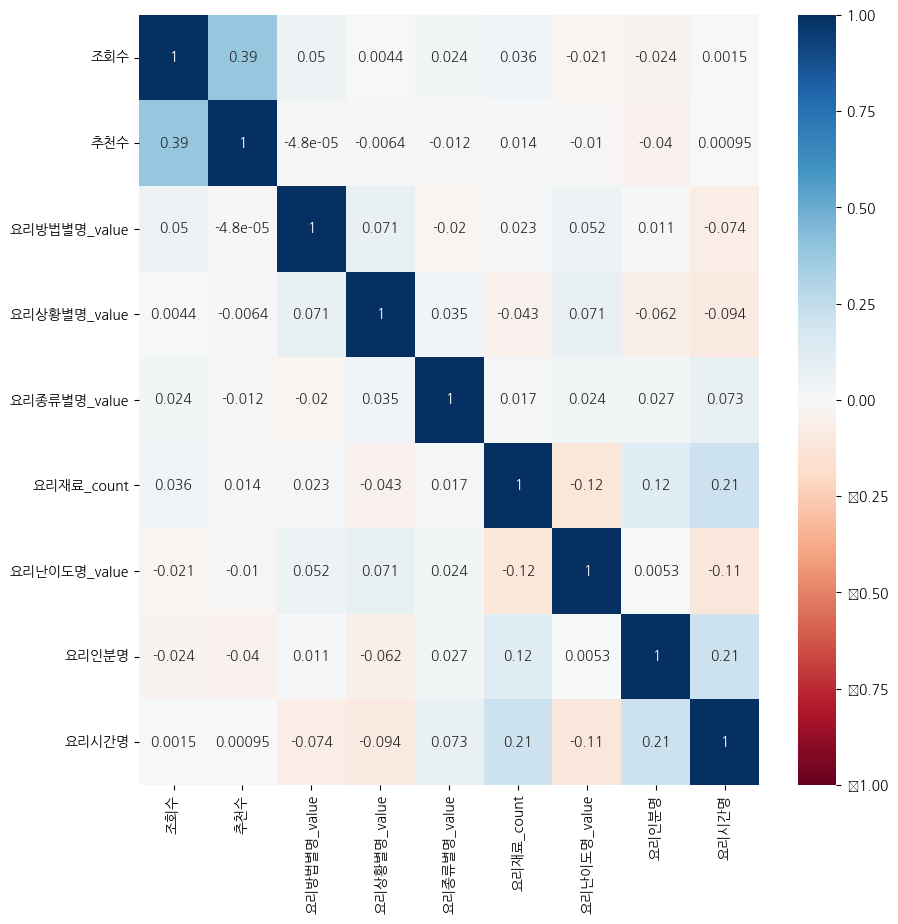

In [31]:
# 상관관계 히트맵 그리기

corr = final_df.corr()
plt.figure(figsize=(10,10))

sns.heatmap(corr,xticklabels =corr.columns , yticklabels = corr.columns, vmin =-1, vmax =1 ,cmap="RdBu",annot=True)
plt.show()

### (2) 조회수와 추천수의 사분위수 확인을 통해 데이터 분석에 적절한 컬럼 확인

In [32]:
# 조회수의 사분위수
Q1 = final_df['조회수'].quantile(.25)
Q3 = final_df['조회수'].quantile(.75)
IQR = Q3 - Q1
Q2 = final_df['조회수'].quantile(.5)
Q4 = final_df['조회수'].quantile(1)

print(Q1, Q2, Q3, Q4, IQR)

2576.0 6183.0 15475.25 2943433.0 12899.25


> 조회수의 사분위수를 활용한 Box plot

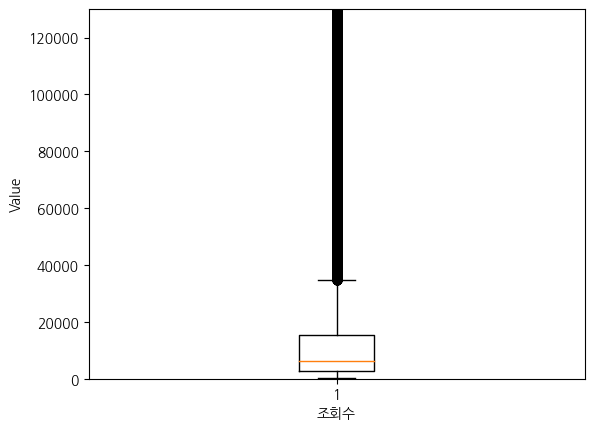

In [33]:
#Box plot - regular scale

fig, ax = plt.subplots()

plt.boxplot(final_df['조회수'])
ax.set_ylim(0, 130000.0)
ax.set_xlabel('조회수')
ax.set_ylabel('Value')
plt.show()

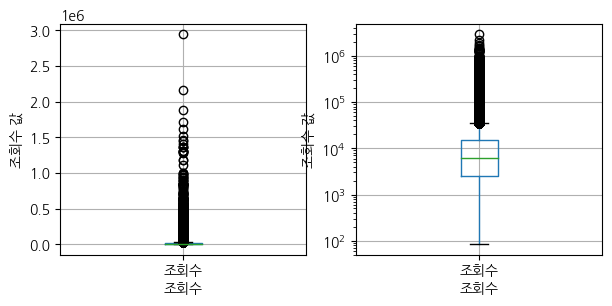

In [34]:
# box plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax[0] = final_df.boxplot(column='조회수', ax=ax[0])
ax[0].set_xlabel('조회수')
ax[0].set_ylabel('조회수 값')

# log scale
ax[1] = final_df.boxplot(column='조회수', ax=ax[1])
ax[1].set_xlabel('조회수')
ax[1].set_ylabel('조회수 값')
ax[1].set_yscale('log')

plt.show()

> 추천수의 사분위수를 활용한 Box plot

In [35]:
# 추천수의 사분위수
Q1 = final_df['추천수'].quantile(.25)
Q3 = final_df['추천수'].quantile(.75)
IQR = Q3 - Q1
Q2 = final_df['추천수'].quantile(.5)
Q4 = final_df['추천수'].quantile(1)

print(Q1, Q2, Q3, Q4, IQR)

0.0 0.0 7.0 2270.0 7.0


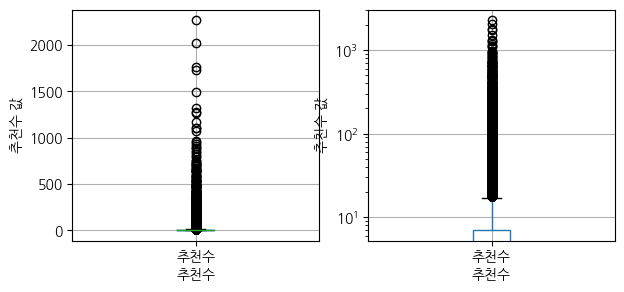

In [36]:
# box plot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(7, 3))

# regular scale
ax[0] = final_df.boxplot(column='추천수', ax=ax[0])
ax[0].set_xlabel('추천수')
ax[0].set_ylabel('추천수 값')

# log scale
ax[1] = final_df.boxplot(column='추천수', ax=ax[1])
ax[1].set_xlabel('추천수')
ax[1].set_ylabel('추천수 값')
ax[1].set_yscale('log')

plt.show()

# STEP3. 분류를 위한 조회수 구분

-조회수와 추천수 중 분류에 더 적합한 값을 알아보기 위해 앞서 4분위수 기반의 box plot을 그려봤음. 하지만 추천수는 분포가 일정하지 않아, log scale 로 변환했음에도 좋지 않은 분포의 모습을 보이고 있어 조회수를 기반으로 분류를 진행하기로 함  

- 조회수 사분위 수를 확인해봤을 때 아래와 같은 결과를 얻었음
  4165.0(Q1) 8487.0(Q2) 17317.75(Q3) 352628.0(Q4) 13152.75(Q3-Q1)



~25% : 4

26~50% : 3 

51~75% : 2

76~100% : 1

- 파생 변수 생성



In [37]:
# final_df 데이터 프레임에서 조회수 값들의 단계를 분류하고, 분류한 값을 파생변수로 만듬
# 파생변수로 만든 값들을 추후 분류모델에서 사용하려고 함 

# final_df 데이터 프레임의 조회수 컬럼에서 값을 가져옴.

view_counts = final_df['조회수']
classification = []

# 조회수 값을 기반으로 분류값을 할당합니다.
for count in view_counts:
    if count <= 4165.0:  # 1분위 수
        classification.append(4)
    elif count <= 8487.0:  # 2분위 수
        classification.append(3)
    elif count <= 17317.75:  # 3분위 수
        classification.append(2)
    else:  # 4분위 수
        classification.append(1)

# 분류값을 final_df 데이터 프레임에 추가합니다.
final_df['조회수_분류값'] = classification

final_df.head()

,요리명,조회수,추천수,요리방법별명_value,요리상황별명_value,요리종류별명_value,요리재료_count,요리난이도명_value,요리인분명,요리시간명,조회수_분류값
0,어묵김말이,9592,6,0,0.0,0.0,10,1.0,2,60,2
1,현미호두죽,2912,0,3,1.0,2.0,5,1.0,2,30,4
2,북어갈비,6865,3,2,2.0,3.0,9,1.0,2,60,3
3,토마토스파게티,12754,2,4,1.0,4.0,6,1.0,1,30,2
4,표고버섯탕수,16053,2,0,3.0,3.0,13,1.0,2,30,2


In [38]:
# 조회수_분류값이 1~4의 라벨 분포가 골고루 들어있는 데이터 추출
balanced_sample_df = final_df.groupby('조회수_분류값').apply(lambda x: x.sample(n=min(250, len(x)), random_state=2021))

# 인덱스 리셋 및 데이터프레임 재정의
sample_df = balanced_sample_df.reset_index(drop=True)

# 결과 확인
print(sample_df.shape)  # 재정의된 데이터프레임의 차원 확인



(1000, 11)


# STEP4. 분류모델 구축하기 


1.   Decision Tree(의사결정 나무)
2.   SVM(Support Vector Machine)



In [39]:
#필요한 라이브러리 임포트
from sklearn.datasets import make_moons
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

# 기계학습 모델 생성, 학습, 평가
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier 
from sklearn.tree import plot_tree # 의사결정 나무 규칙을 시각화하기 위한 패키지
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score, recall_score, precision_score
import sklearn.metrics as mt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score, cross_validate
from tqdm import tqdm
from sklearn.model_selection import KFold



# 시각화
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False

# 한글 폰트 설정
plt.rc('font', family='NanumGothic')


##1. Decision Tree


In [40]:

#모델 학습 

# 데이터셋 구분 - 설명변수, 예측변수 정의
feature = final_df[['추천수','요리방법별명_value','요리상황별명_value','요리종류별명_value','요리재료_count','요리난이도명_value','요리인분명','요리시간명']]
target = final_df['조회수_분류값']

#train data와 test data 구분(7:3 비율)
X_train,X_test, y_train, y_test = train_test_split(feature,target,test_size = 0.3, random_state=1)


# Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


print('train data 개수', X_train.shape)
print('test data 개수', X_test.shape)


train data 개수 (87640, 8)
test data 개수 (37560, 8)


In [41]:
from sklearn.model_selection import GridSearchCV

# 테스트하고자 하는 파라미터 값들을 사전타입으로 정의

dt_clf = DecisionTreeClassifier(random_state=33)
parameters = {'max_depth': [3, 4, 5, 7],
              'min_samples_split': [3, 5],
              'splitter': ['best', 'random']}

grid_dt = GridSearchCV(dt_clf, # estimator 객체,
                      param_grid = parameters, cv = 5)

grid_dt.fit(X_train, y_train)

result = pd.DataFrame(grid_dt.cv_results_['params'])
result['mean_test_score'] = grid_dt.cv_results_['mean_test_score']
result.sort_values(by='mean_test_score', ascending=False)

,max_depth,min_samples_split,splitter,mean_test_score
12,7,3,best,0.518382
14,7,5,best,0.518382
8,5,3,best,0.515484
10,5,5,best,0.515484
4,4,3,best,0.511570
6,4,5,best,0.511570
0,3,3,best,0.503948
2,3,5,best,0.503948
13,7,3,random,0.431698
15,7,5,random,0.423779


In [42]:
#위에서 확인한 값을 기반으로 모델 학습하기  앞선 자료를 통해 7은 너무 깊고 4는짝수이기 떄문에 최대깊이를 5로함
model = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=3,splitter='best' ) 
model.fit(X_train, y_train)

# test data를 가지고 y-hat 예측(분류)
y_hat = model.predict(X_test)

print(y_hat[0:10])
print(y_test.values[0:10])

[4 4 4 4 2 2 4 4 4 2]
[1 4 4 2 2 1 4 3 4 3]


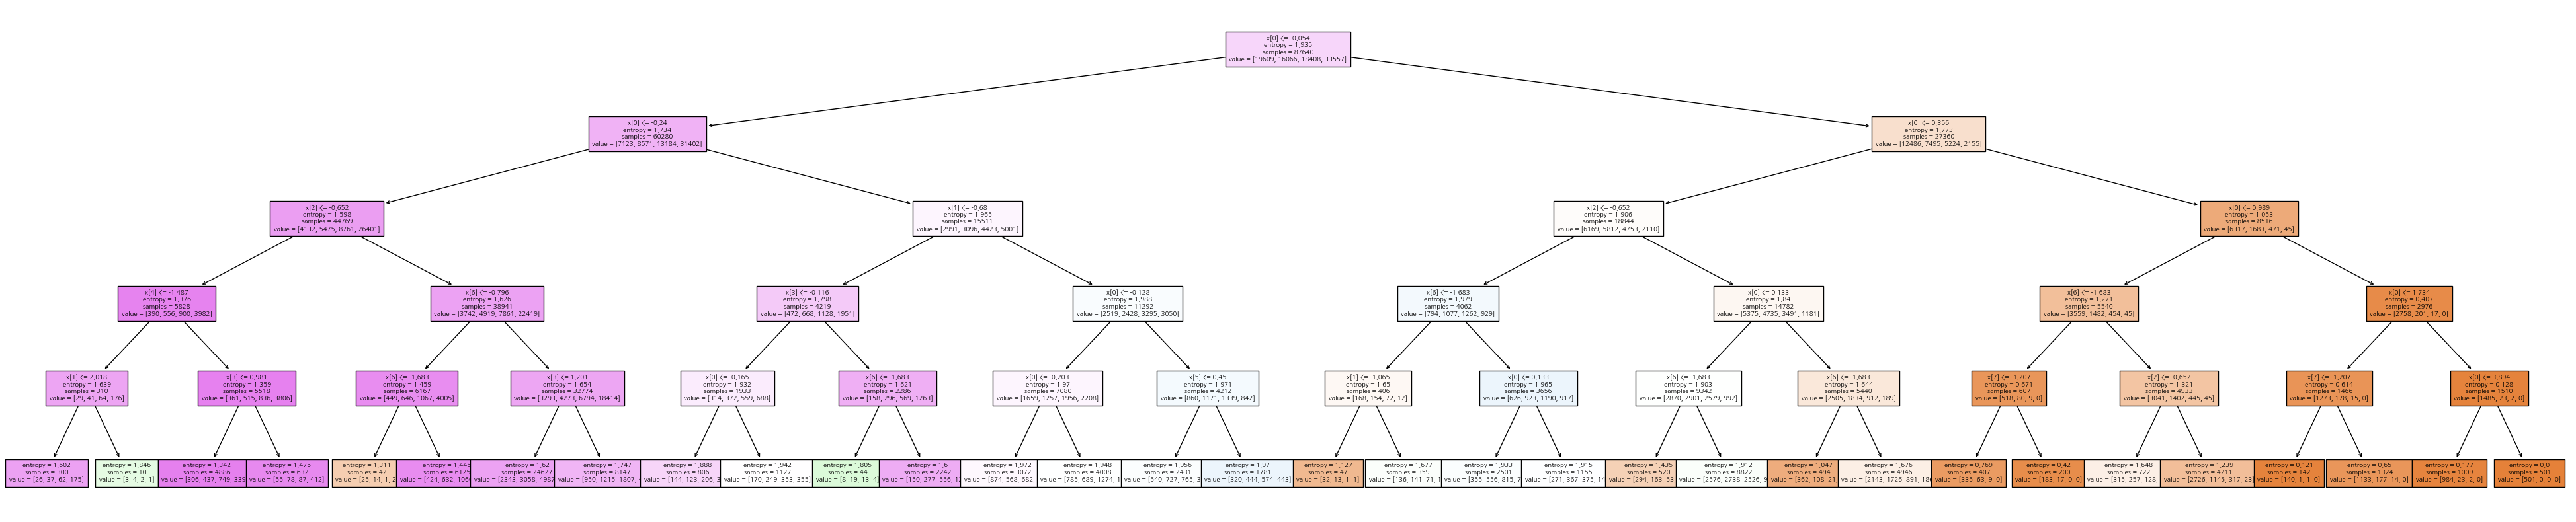

In [45]:
# 학습에 사용되었던 의사결정나무 규칙 시각화
plt.figure(figsize=(50,10))
plot_tree(decision_tree=model ,fontsize=7, filled=True) # filled : 많은 클래스가 포함되어 있는 것으로 색 표기
plt.show()


In [46]:
# 모형 성능평가 confusion matrix 
from sklearn import metrics
tree_matrix = metrics.confusion_matrix(y_test,y_hat)
print(tree_matrix)
print('\n')

#모형 성능 평가 - 평가 지표 계산
tree_report = metrics.classification_report(y_test,y_hat)
print(tree_report)

[[ 4034  1177   981  2351]
 [ 1570  1324  1213  2737]
 [  657  1111  1532  4571]
 [   95   421  1251 12535]]


              precision    recall  f1-score   support

           1       0.63      0.47      0.54      8543
           2       0.33      0.19      0.24      6844
           3       0.31      0.19      0.24      7871
           4       0.56      0.88      0.69     14302

    accuracy                           0.52     37560
   macro avg       0.46      0.43      0.43     37560
weighted avg       0.48      0.52      0.48     37560



In [47]:
#full-결정트리의 5-fold 교차 검증
model = DecisionTreeClassifier()

scores = cross_val_score(model, X_train, y_train, cv=5)
print('Accuracy score of each fold:', [f'{acc:.3f}' for acc in scores])
print(f'Accuracy: {scores.mean():.3f} (+/- {scores.std() * 2:.3f})')

Accuracy score of each fold: ['0.403', '0.399', '0.398', '0.410', '0.402']
Accuracy: 0.402 (+/- 0.008)


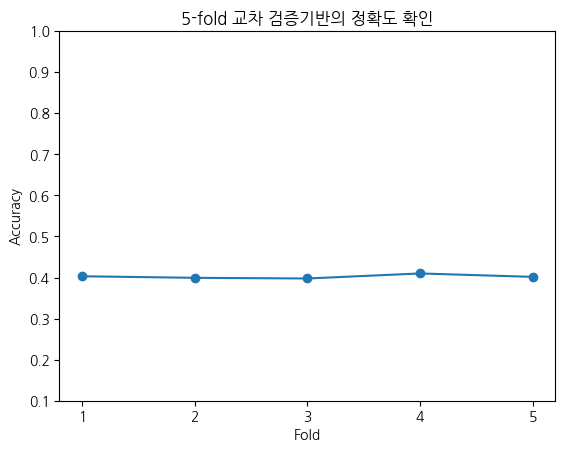

In [48]:
#plot accuracy scores of each fold

fig,ax = plt.subplots()
ax.plot(range(1,6), scores, 'o-')
ax.set_xlabel('Fold')
ax.set_ylabel('Accuracy')
ax.set_title('5-fold 교차 검증기반의 정확도 확인')
ax.set_xticks(range(1,6))
ax.set_ylim(0.1,1)
plt.show()

In [61]:
# Tree 정리
recall = recall_score(y_test, y_hat,average='macro') ## 민감도
precision = precision_score(y_test, y_hat, average='macro') ## 정밀도


print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep='  |  ') 

정확도:0.5188  |  민감도:0.2508  |  정밀도:0.2520


확인 결과
* 성능 결과가 서로 다른 데이터 분할에서 유사한 성능을 보이고 있으나 성능 자체가 좋지 않다고 판단됨


## 2. SVM 



In [49]:
#sklearn 라이브러리에서 SVM 분류모형 가져오기
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn import svm

import sklearn.metrics as mt
from sklearn.model_selection import cross_val_score, cross_validate


In [50]:
#모델 학습 

# 데이터셋 구분 - 설명변수, 예측변수 정의
feature = final_df[['추천수','요리방법별명_value','요리상황별명_value','요리종류별명_value','요리재료_count','요리난이도명_value','요리인분명','요리시간명']]    #독립변수 X
target = final_df['조회수_분류값']    #종속변수 Y

#train data와 test data 구분(7:3 비율)
X_train,X_test, y_train, y_test = train_test_split(feature,target,test_size = 0.3,stratify=target ,random_state=1)


# 데이터 컬럼 단위 정규화 Scaling 
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


print('train data의 차원', X_train.shape)
print('test data의 차원', X_test.shape)

train data의 차원 (87640, 8)
test data의 차원 (37560, 8)


In [51]:
## 모델링 
## 하이퍼파라미터 결정
svc = SVC(random_state=2021)
param_grid = [{'kernel': ['linear'], 'C': [0.1, 1, 10]},
              {'kernel': ['rbf'], 'gamma': [1, 0.1, 0.01]}]


scores = ['precision', 'recall']
for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()
    
    CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, scoring = f'{score}_macro', cv=5, verbose=2)
    CV_svc.fit(X_train, y_train)

    print("Best parameters set found on development set:")
    print()
    print(CV_svc.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = CV_svc.cv_results_['mean_test_score']
    stds = CV_svc.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, CV_svc.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("전체 데이터셋을 활용하여 모델 훈련됨")
    print("모델의 성능 평가 점수(정확도, 정밀도, 재현율 등)는 전체 평가 데이터셋을 사용하여 계산됨")
    print()
    y_true, y_pred = y_test, CV_svc.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

CV_svc = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, verbose=2 )
CV_svc.fit(X_train, y_train)

# Tuning hyper-parameters for precision

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ...............................C=0.1, kernel=linear; total time= 3.4min
[CV] END ...............................C=0.1, kernel=linear; total time= 3.3min
[CV] END ...............................C=0.1, kernel=linear; total time= 3.4min
[CV] END ...............................C=0.1, kernel=linear; total time= 3.4min
[CV] END ...............................C=0.1, kernel=linear; total time= 3.3min
[CV] END .................................C=1, kernel=linear; total time= 4.1min
[CV] END .................................C=1, kernel=linear; total time= 4.1min
[CV] END .................................C=1, kernel=linear; total time= 4.2min
[CV] END .................................C=1, kernel=linear; total time= 4.1min
[CV] END .................................C=1, kernel=linear; total time= 4.1min
[CV] END ................................C=10, kernel=linear; total time=11.6min
[CV] END

[CV] END ................................C=10, kernel=linear; total time=13.2min
[CV] END ................................gamma=1, kernel=rbf; total time=12.1min
[CV] END ................................gamma=1, kernel=rbf; total time=11.9min
[CV] END ................................gamma=1, kernel=rbf; total time=11.7min
[CV] END ................................gamma=1, kernel=rbf; total time=11.8min
[CV] END ................................gamma=1, kernel=rbf; total time=12.1min
[CV] END ..............................gamma=0.1, kernel=rbf; total time= 7.8min
[CV] END ..............................gamma=0.1, kernel=rbf; total time= 7.8min
[CV] END ..............................gamma=0.1, kernel=rbf; total time=28.0min
[CV] END ..............................gamma=0.1, kernel=rbf; total time= 7.8min
[CV] END ..............................gamma=0.1, kernel=rbf; total time= 8.0min
[CV] END .............................gamma=0.01, kernel=rbf; total time= 7.7min
[CV] END ...................

GridSearchCV(cv=5, estimator=SVC(random_state=2021),
             param_grid=[{'C': [0.1, 1, 10], 'kernel': ['linear']},
                         {'gamma': [1, 0.1, 0.01], 'kernel': ['rbf']}],
             verbose=2)

In [55]:
best_svc = CV_svc.best_estimator_
best_svc.fit(X_train, y_train)

SVC(gamma=0.1, random_state=2021)

In [56]:
# Train set에 대한 성능
y_pred = best_svc.predict(X_train)
acc = accuracy_score(y_true = y_train, y_pred =y_pred)
print("Train set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  

# Test set에 대한 성능
y_pred = best_svc.predict(X_test)
acc = accuracy_score(y_true = y_test, y_pred =y_pred)
print("\n")  
print("Test set에 대한 성능")  
print(f"정확도:{acc:0.4f}")  


Train set에 대한 성능
정확도:0.5238


Test set에 대한 성능
정확도:0.5188


In [58]:
recall = recall_score(y_true = y_test, y_pred =y_pred,average='macro') ## 민감도
precision = precision_score(y_true = y_test, y_pred =y_pred, average='macro') ## 정밀도


print(f"정확도:{acc:0.4f}",f"민감도:{recall:0.4f}",f"정밀도:{precision:0.4f}", sep='  |  ') 

정확도:0.5188  |  민감도:0.4202  |  정밀도:0.4535


# 결론

* 두모델 모두 낮은 정확도를 보였지만, 비교적 파라미터 튜닝을 통해 선택된 svm의 결과가 Decision tree보다는 나았다..